In [80]:
# HW 1

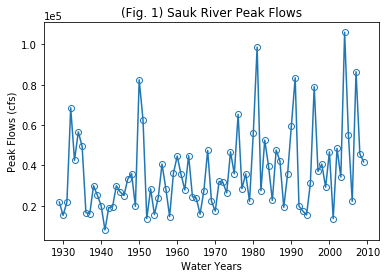

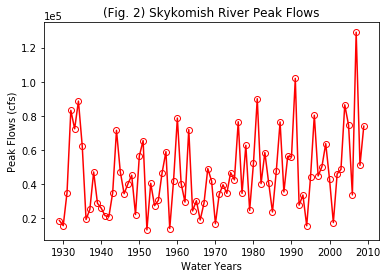

In [101]:
# Problem 1,A

# Needed to read .xlsx file
import xlrd
# Needed to plot
import matplotlib.pyplot as plt

# Define locations of .xlsx files
Sauk_Data = ('Sauk_peak_WY1929_2017.xlsx')
Skykomish_Data = ('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')

# Create workbooks and sheets
Sauk_wb = xlrd.open_workbook(Sauk_Data)
Sauk_Sheet = Sauk_wb.sheet_by_index(0)

Skykomish_wb = xlrd.open_workbook(Skykomish_Data)
Skykomish_Sheet = Skykomish_wb.sheet_by_index(0)

# Create and populate years array, peak values array for each site from 1929-2009
Sauk_Year = []
Sauk_Peak = []
# Sauk has 8 rows of comments before data
for i in range(8,Sauk_Sheet.nrows-8):
    Sauk_Year.append(Sauk_Sheet.cell_value(i,0))
    Sauk_Peak.append(Sauk_Sheet.cell_value(i,2))
    
Skykomish_Year = []
Skykomish_Peak = []
# Skykomish has 1 row of comments before data
for j in range(1,Skykomish_Sheet.nrows):
    Skykomish_Year.append(Skykomish_Sheet.cell_value(j,1))
    Skykomish_Peak.append(Skykomish_Sheet.cell_value(j,2))

# Plot data from 1929-2009 for both sites
plt.figure(1)
plt.plot(Sauk_Year, Sauk_Peak, '-o', markerfacecolor="None")
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 1) Sauk River Peak Flows')
plt.ticklabel_format(axis='x', useOffset=False)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

plt.figure(2)
plt.plot(Skykomish_Year, Skykomish_Peak,'-ro', markerfacecolor="None")
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 2) Skykomish River Peak Flows')
plt.ticklabel_format(axis='x', useOffset=False)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

(0, 25)

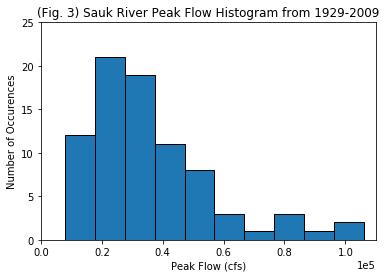

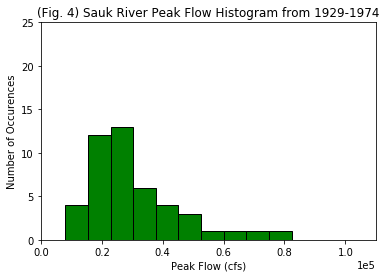

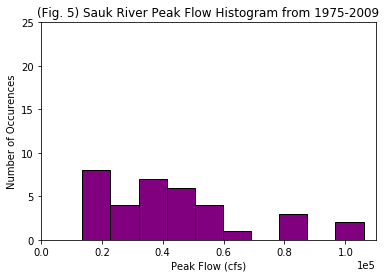

In [102]:
# Problem 1,B,1

# Plot histogram of Sauk peak flow for 1929-2009
nbins = 10
plt.figure(3)
plt.hist(Sauk_Peak, nbins, ec="black")
plt.title('(Fig. 3) Sauk River Peak Flow Histogram from 1929-2009')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([0,110000])
plt.ylim([0,25])

# Create new list of data points for period 1 (1929-1974)
Sauk_Peak_1 = []
for i in range(46):
    Sauk_Peak_1.append(Sauk_Peak[i])

# Plot histogram of Sauk peak flow for period 1 (1929-1974)
plt.figure(4)
plt.hist(Sauk_Peak_1, nbins, color = "green", ec="black")
plt.title('(Fig. 4) Sauk River Peak Flow Histogram from 1929-1974')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([0,110000])
plt.ylim([0,25])

# Create new list of data points for period 2 (1975-2009)
Sauk_Peak_2 = []
for j in range(46,len(Sauk_Peak)):
    Sauk_Peak_2.append(Sauk_Peak[j])

# Plot histogram of Sauk peak flor for period 2 (1975-2009)
plt.figure(5)
plt.hist(Sauk_Peak_2, nbins, color="purple", ec="black")
plt.title('(Fig. 5) Sauk River Peak Flow Histogram from 1975-2009')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([0,110000])
plt.ylim([0,25])

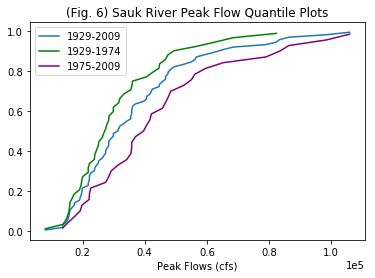

In [103]:
# Problem 1,B,2

# Function for Quantile plot
def quantile_fn(data):

    # Create ordered data for Quantile plot of entire period
    ordered_data = sorted(data)
    n = len(ordered_data)

    # Assign rank and plotting position
    rank = []
    plotting_position = []
    for i in range(n):
        rank.append(i+1)
        plotting_position.append((rank[i]-.4)/(n+.2))
        
    return ordered_data, plotting_position

# Call quantile function
Sauk_data_entire, Sauk_plotting_entire = quantile_fn(Sauk_Peak)
Sauk_data_1, Sauk_plotting_1 = quantile_fn(Sauk_Peak_1)
Sauk_data_2, Sauk_plotting_2 = quantile_fn(Sauk_Peak_2)
    
# Plot data by plotting position
plt.figure(6)
plt.plot(Sauk_data_entire, Sauk_plotting_entire, label='1929-2009')
plt.plot(Sauk_data_1, Sauk_plotting_1, color='green', label='1929-1974')
plt.plot(Sauk_data_2, Sauk_plotting_2, color='purple', label='1975-2009')
plt.xlabel('Peak Flows (cfs)')
plt.title('(Fig. 6) Sauk River Peak Flow Quantile Plots')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

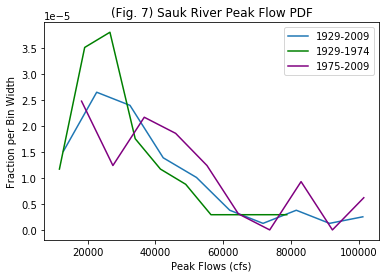

In [104]:
# Problem 1,B,3

import numpy as np

# Function for PDF
def make_pdf(data, nbins):
    
    # Pull counts, bins (gives locations of left sides and the right side of the last bin), and patches from the histogram plots
    counts, bins, patches = plt.hist(data, nbins)
    plt.close()
    
    # Find the centers of th ebins
    width = bins[2]-bins[1]
    centers = bins + width/2
    # plt.hist() includes the right side of the last bin, which we don't want in the data
    centers_list = np.array(centers).tolist()
    centers_list.remove(centers_list[len(centers_list)-1])

    # Calculate the area under the curve
    areas = [c * width for c in counts]
    area_under_curve = sum(areas)

    # Calculate the fraction of area vs counts
    fractions = [c / area_under_curve for c in counts]
    
    return centers_list, fractions

nbins = 10
centers_list, fractions = make_pdf(Sauk_Peak, nbins)
centers_list_1, fractions_1 = make_pdf(Sauk_Peak_1, nbins)
centers_list_2, fractions_2 = make_pdf(Sauk_Peak_2, nbins)

plt.figure(7)
plt.plot(centers_list, fractions, label='1929-2009')
plt.plot(centers_list_1, fractions_1, color="green", label='1929-1974')
plt.plot(centers_list_2, fractions_2, color="purple", label='1975-2009')
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 7) Sauk River Peak Flow PDF')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc="best")

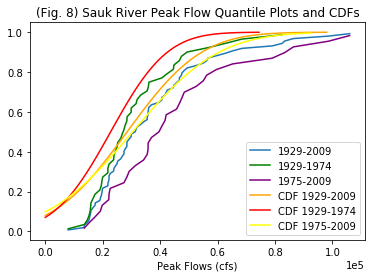

In [105]:
# Problem 1,B,4

import statistics as stats
from scipy.stats import norm

# Function for CDF
def make_cdf(data):
    mean = stats.mean(data)
    sd = stats.stdev(data)
    n = len(data)
    num = int(data[n-1]-data[0])
    return np.linspace(data[0], data[n-1], num), mean, sd

# Call function for each period
x, mean, sd = make_cdf(Sauk_data_entire)
x_1, mean_1, sd_1 = make_cdf(Sauk_data_1)
x_2, mean_2, sd_2 = make_cdf(Sauk_data_2)

# Plot all
plt.figure(8)
plt.plot(Sauk_data_entire, Sauk_plotting_entire, label='1929-2009')
plt.plot(Sauk_data_1, Sauk_plotting_1, color='green', label='1929-1974')
plt.plot(Sauk_data_2, Sauk_plotting_2, color='purple', label='1975-2009')
plt.plot(norm.cdf(x, mean, sd), color='orange', label='CDF 1929-2009')
plt.plot(norm.cdf(x_1, mean_1, sd_1), color='red', label='CDF 1929-1974')
plt.plot(norm.cdf(x_2, mean_2, sd_2), color='yellow', label='CDF 1975-2009')
plt.xlabel('Peak Flows (cfs)')
plt.title('(Fig. 8) Sauk River Peak Flow Quantile Plots and CDFs')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

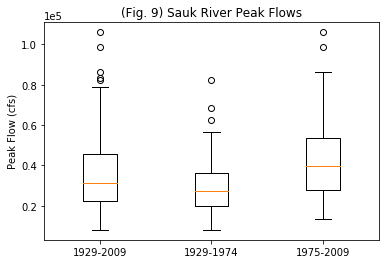

In [128]:
# Problem 1,B,5

# Boxplots for all three periods
fig9, ax = plt.subplots()
data = [Sauk_Peak, Sauk_Peak_1, Sauk_Peak_2]
ax.boxplot(data)
plt.ylabel('Peak Flow (cfs)')
plt.title('(Fig. 9) Sauk River Peak Flows')
plt.xticks([1, 2, 3], ['1929-2009', '1929-1974', '1975-2009'])
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

In [129]:
# Problem 3,A

import math

mean = 60
sd = 35
size = 1000

# For lognormal data
mean_scaled = math.log(mean*mean / math.sqrt(mean*mean + sd*sd))
sd_scaled = math.sqrt(math.log((mean*mean + sd*sd) / (mean*mean)))

# Create data
data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

Text(0,0.5,'Number of Occurences')

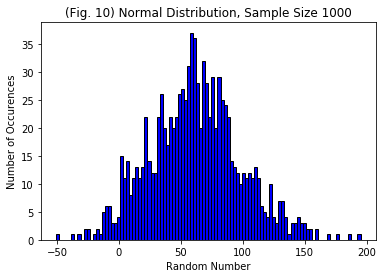

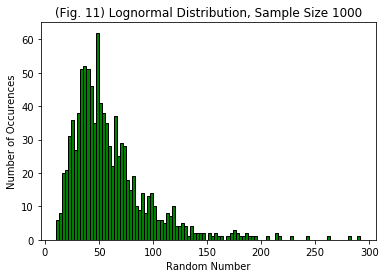

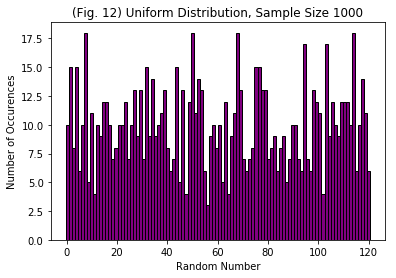

In [130]:
# Problem 3,B (histograms)

# Plot histograms
nbins = 100

# Plot normal
plt.figure(10)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 10) Normal Distribution, Sample Size 1000')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(11)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 11) Lognormal Distribution, Sample Size 1000')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(12)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 12) Uniform Distribution, Sample Size 1000')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

([<matplotlib.axis.XTick at 0x198a77eecc0>,
 <a list of 3 Text xticklabel objects>)

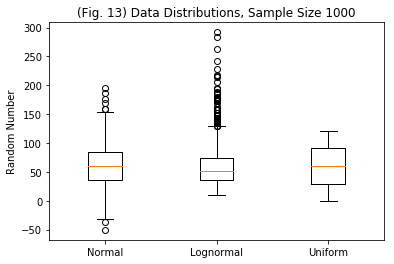

In [131]:
# Problem 3,B, continued (box and whiskers)

#Plot box and whisker plots
fig13, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 13) Data Distributions, Sample Size 1000')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

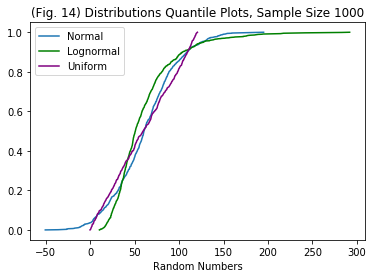

In [132]:
# Problem 3,B continued (Quantile plot)

# Call quantile function
ordered_data_n, plotting_position_n = quantile_fn(data_normal)
ordered_data_ln, plotting_position_ln = quantile_fn(data_lognormal)
ordered_data_u, plotting_position_u = quantile_fn(data_uniform)
    
# Plot data by plotting position
plt.figure(14)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 14) Distributions Quantile Plots, Sample Size 1000')
plt.legend(loc="best")

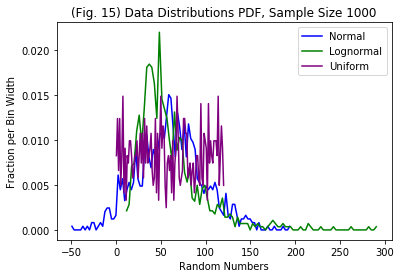

In [133]:
# Problem 3,B, continued (PDFs)

# Call PDF function
centers_list_n, fractions_n = make_pdf(data_normal, nbins)
centers_list_ln, fractions_ln = make_pdf(data_lognormal, nbins)
centers_list_u, fractions_u = make_pdf(data_uniform, nbins)

# Plot PDF
plt.figure(15)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 15) Data Distributions PDF, Sample Size 1000')
plt.legend(loc="best")

([<matplotlib.axis.XTick at 0x198a70c89b0>,
 <a list of 3 Text xticklabel objects>)

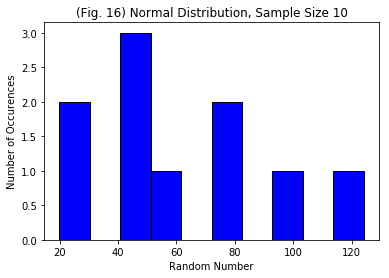

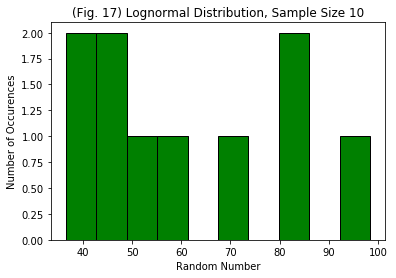

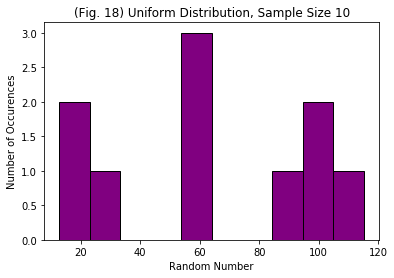

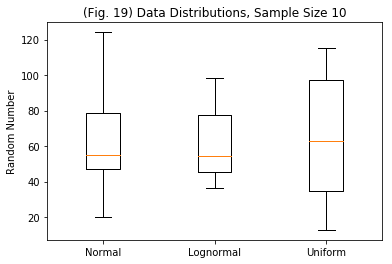

In [113]:
# Problem 3,C (sample size 10; histograms, box and whisker)

# Recreate data
size = 10

data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

# Plot histograms
nbins = 10

# Plot normal
plt.figure(16)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 16) Normal Distribution, Sample Size 10')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(17)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 17) Lognormal Distribution, Sample Size 10')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(18)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 18) Uniform Distribution, Sample Size 10')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

#Plot box and whisker plots
fig19, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 19) Data Distributions, Sample Size 10')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

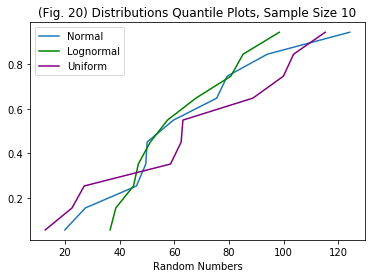

In [114]:
# Problem 3,C continued (sample size 10; quantile plot)

# Call quantile function
ordered_data_n, plotting_position_n = quantile_fn(data_normal)
ordered_data_ln, plotting_position_ln = quantile_fn(data_lognormal)
ordered_data_u, plotting_position_u = quantile_fn(data_uniform)
    
# Plot data by plotting position
plt.figure(20)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 20) Distributions Quantile Plots, Sample Size 10')
plt.legend(loc="best")

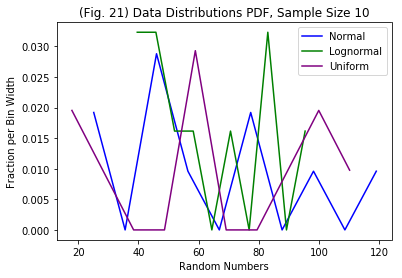

In [115]:
# Problem 3,C, continued (sample size 10; PDFs continued)

# Call PDF function
nbins = 10
centers_list_n, fractions_n = make_pdf(data_normal, nbins)
centers_list_ln, fractions_ln = make_pdf(data_lognormal, nbins)
centers_list_u, fractions_u = make_pdf(data_uniform, nbins)

# Plot PDF
plt.figure(21)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 21) Data Distributions PDF, Sample Size 10')
plt.legend(loc="best")

([<matplotlib.axis.XTick at 0x198a4c44780>,
 <a list of 3 Text xticklabel objects>)

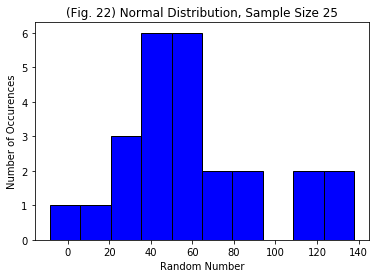

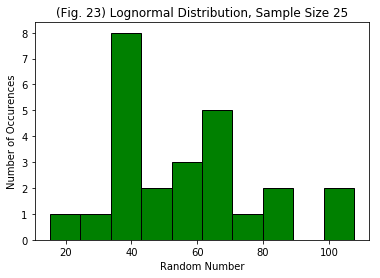

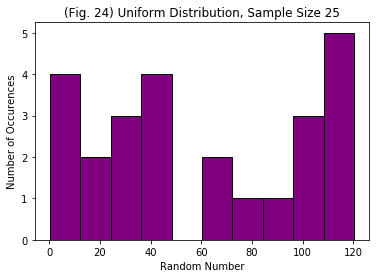

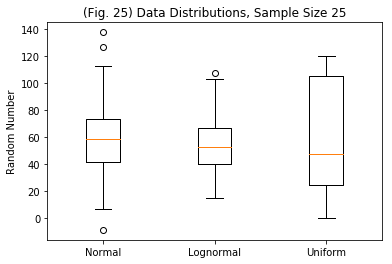

In [116]:
# Problem 3,C, continued (sample size 25; histograms, box and whisker)

# Recreate data
size = 25

data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

# Plot histograms
nbins = 10

# Plot normal
plt.figure(22)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 22) Normal Distribution, Sample Size 25')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(23)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 23) Lognormal Distribution, Sample Size 25')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(24)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 24) Uniform Distribution, Sample Size 25')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

#Plot box and whisker plots
fig25, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 25) Data Distributions, Sample Size 25')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

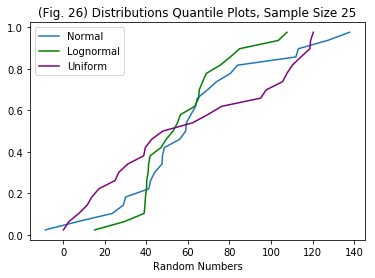

In [117]:
# Problem 3,B continued (sample size 25; quantile)

# Call quantile function
ordered_data_n, plotting_position_n = quantile_fn(data_normal)
ordered_data_ln, plotting_position_ln = quantile_fn(data_lognormal)
ordered_data_u, plotting_position_u = quantile_fn(data_uniform)
    
# Plot data by plotting position
plt.figure(26)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 26) Distributions Quantile Plots, Sample Size 25')
plt.legend(loc="best")

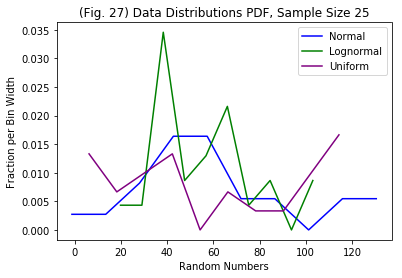

In [118]:
# Problem 3,C, cont (sample size 25; PDFs continued)

# Call PDF function
nbins = 10
centers_list_n, fractions_n = make_pdf(data_normal, nbins)
centers_list_ln, fractions_ln = make_pdf(data_lognormal, nbins)
centers_list_u, fractions_u = make_pdf(data_uniform, nbins)

# Plot PDF
plt.figure(27)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 27) Data Distributions PDF, Sample Size 25')
plt.legend(loc="best")

([<matplotlib.axis.XTick at 0x198a1826860>,
 <a list of 3 Text xticklabel objects>)

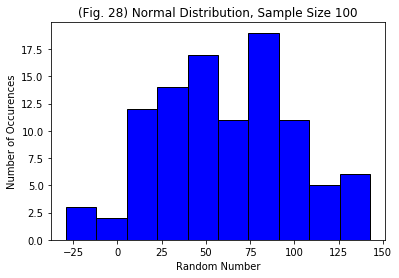

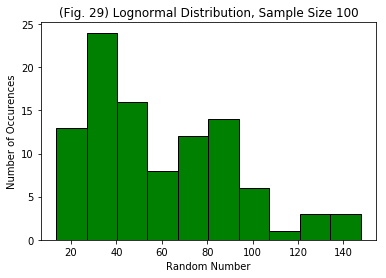

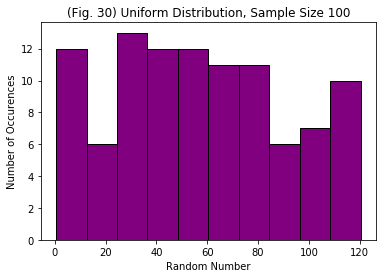

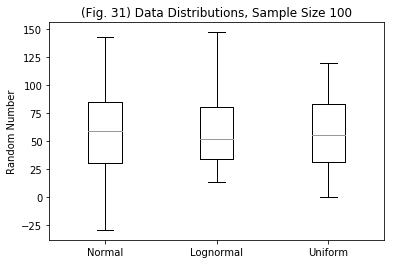

In [119]:
# Problem 3,C, continued (sample size 100; histograms, box and whisker)

# Recreate data
size = 100

data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

# Plot histograms
nbins = 10

# Plot normal
plt.figure(28)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 28) Normal Distribution, Sample Size 100')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(29)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 29) Lognormal Distribution, Sample Size 100')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(30)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 30) Uniform Distribution, Sample Size 100')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

#Plot box and whisker plots
fig31, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 31) Data Distributions, Sample Size 100')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

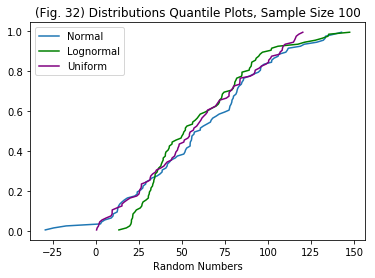

In [120]:
# Problem 3,C continued (sample size 100; quantile plots)

# Call quantile function
ordered_data_n, plotting_position_n = quantile_fn(data_normal)
ordered_data_ln, plotting_position_ln = quantile_fn(data_lognormal)
ordered_data_u, plotting_position_u = quantile_fn(data_uniform)
    
# Plot data by plotting position
plt.figure(32)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 32) Distributions Quantile Plots, Sample Size 100')
plt.legend(loc="best")

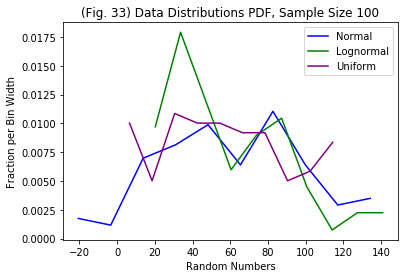

In [121]:
# Problem 3,C, continued (sample size 100; PDFs continued)

# Call PDF function
nbins = 10
centers_list_n, fractions_n = make_pdf(data_normal, nbins)
centers_list_ln, fractions_ln = make_pdf(data_lognormal, nbins)
centers_list_u, fractions_u = make_pdf(data_uniform, nbins)

# Plot PDF
plt.figure(33)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 33) Data Distributions PDF, Sample Size 100')
plt.legend(loc="best")